## Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
df=pd.read_csv('SalesData.csv')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9983 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.shape

(9994, 21)

## Data Cleaning

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [7]:
df[df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2017-104066,12/5/2017,12/10/2017,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2015-162887,11/7/2015,11/9/2015,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2016-150140,4/6/2016,4/10/2016,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2016-165505,1/23/2016,1/27/2016,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2016-165505,1/23/2016,1/27/2016,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2016-165505,1/23/2016,1/27/2016,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2017-127292,1/19/2017,1/23/2017,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2017-127292,1/19/2017,1/23/2017,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2017-127292,1/19/2017,1/23/2017,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2017-127292,1/19/2017,1/23/2017,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


In [8]:
# As all the missing value records are from the city Burlington, got the postal code from google and replaced the null values.
df["Postal Code"]= df["Postal Code"].fillna(05401.)

In [9]:
# Checking if the null values are replaced
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
# Checking for Duplicates
df.duplicated().sum()

0

In [11]:
df[df.duplicated(subset=["Order ID","Product ID","Order Date"],keep=False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
350,351,CA-2016-129714,9/1/2016,9/3/2016,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,24.560,2,0.0,11.5432
352,353,CA-2016-129714,9/1/2016,9/3/2016,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,49.120,4,0.0,23.0864
430,431,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,28052.0,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,408.744,7,0.2,76.6395
431,432,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,28052.0,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,291.960,5,0.2,54.7425
1300,1301,CA-2016-137043,12/23/2016,12/25/2016,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,...,22153.0,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",572.760,6,0.0,166.1004
1301,1302,CA-2016-137043,12/23/2016,12/25/2016,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,...,22153.0,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",286.380,3,0.0,83.0502
3183,3184,CA-2017-152912,11/9/2017,11/12/2017,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,...,21044.0,East,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,1633.140,9,0.0,473.6106
3184,3185,CA-2017-152912,11/9/2017,11/12/2017,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,...,21044.0,East,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,544.380,3,0.0,157.8702
3405,3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,...,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,...,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


These records are not duplicates but rather separate line items within the same order. While they share identical Order ID, Order Date, and Product ID, they differ in the crucial Quantity field. The Sales and Profit values are proportionally different, aligning with the distinct quantities. This structure allows for detailed tracking of multiple purchases of the same product within a single order, which is common in retail transactions. Therefore, these records represent valid and i am aggregating them by summing Quanitiy,Profit and Sales.


In [12]:
# Aggregate data for identical Order ID, Product ID, and Order Date
agg_df = df.groupby(["Order ID", "Product ID", "Order Date"]).agg({
    "Row ID": "first",
    "Ship Date": "first",
    "Ship Mode": "first",
    "Customer ID": "first",
    "Customer Name": "first",
    "Segment": "first",
    "Country": "first",
    "City": "first",
    "Postal Code": "first",
    "Region": "first",
    "State": "first",
    "Category": "first",
    "Sub-Category": "first",
    "Product Name": "first",
    "Sales": "sum",
    "Quantity": "sum",
    "Discount": "mean",  # Assuming an average discount is relevant
    "Profit": "sum"
}).reset_index()

# Reorder columns to match the original structure
desired_order = [
    "Row ID", "Order ID", "Order Date", "Ship Date", "Ship Mode", "Customer ID", "Customer Name", "Segment",
    "Country", "City", "Postal Code", "Region","State", "Product ID", "Category", "Sub-Category", "Product Name",
    "Sales", "Quantity", "Discount", "Profit"
]
agg_df = agg_df[desired_order]

# Sorting by Row ID to ensure it's in ascending order
agg_df = agg_df.sort_values(by="Row ID").reset_index(drop=True)

# Display the cleaned and aggregated DataFrame
agg_df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,California,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,Florida,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,Florida,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9982,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,California,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9983,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,California,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9984,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,California,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## Data Wrangling

In [13]:
agg_df["Order Date"] = pd.to_datetime(agg_df["Order Date"])
agg_df["Ship Date"] = pd.to_datetime(agg_df["Ship Date"])

In [14]:
agg_df['Order Date'].agg(['min','max'])

min   2014-01-03
max   2017-12-30
Name: Order Date, dtype: datetime64[ns]

In [15]:
agg_df['Ship Date'].agg(['min','max'])

min   2014-01-07
max   2018-01-05
Name: Ship Date, dtype: datetime64[ns]

In [16]:
# Printing unique values for each column
columns_to_check = ["State", "Product ID", "Category", "Sub-Category", "Ship Mode"]

for column in columns_to_check:
    unique_values = agg_df[column].unique()
    print(f"Unique values in'{column}':{len(unique_values)}")
    print(unique_values)
    print("-" * 50)

Unique values in'State':49
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
--------------------------------------------------
Unique values in'Product ID':1862
['FUR-BO-10001798' 'FUR-CH-10000454' 'OFF-LA-10000240' ...
 'OFF-AP-10003099' 'TEC-PH-10002645' 'OFF-ST-10001627']
--------------------------------------------------
Unique values in'Category':3
['Furniture' 'Office Supplies' 'Technology']
--------------------------------------------------
Unique val

## Integrating External Data

In [17]:
# API key
api_key = 'pYGsVcWtW2Kxgjl2H0GwN3PY7OBg0A60'   # Login in to Calendarific and obtain your api key.

In [18]:
# Country code for the US
country_code = 'US'
year_range = range(2013, 2021)  # Years between 2013 and 2020

all_holidays = []

# Loop through the years to fetch holiday data
for year in year_range:
    url = f'https://calendarific.com/api/v2/holidays'
    params = {
        'api_key': api_key,
        'country': country_code,
        'year': year
    }

    response = requests.get(url, params=params)
    holiday_data = response.json()

    # Checking if data is successfully retrieved and holidays exist
    if response.status_code == 200 and holiday_data.get('response'):
        holidays = holiday_data['response']['holidays']
        for holiday in holidays:
            holiday_info = {
                'Year': year,
                'Holiday Name': holiday['name'],
                'Holiday Date': holiday['date']['iso'],
                'Holiday Type': holiday['type'][0]  # First holiday type (e.g., National holiday)
            }
            all_holidays.append(holiday_info)
    else:
        print(f"No holidays data found for {year} or error occurred.")

# Converting the list of holidays to a DataFrame
if all_holidays:
    holiday_df = pd.DataFrame(all_holidays)
    holiday_df['Holiday Date'] = pd.to_datetime(holiday_df['Holiday Date'])  # Convert to datetime
    print("Holiday DataFrame:")
    print(holiday_df)
    
    # Save the DataFrame to a CSV file
    holiday_df.to_csv('holiday_data.csv', index=False)
else:
    print("No holidays data to convert.")


Holiday DataFrame:
      Year                                Holiday Name         Holiday Date  \
0     2013                              New Year's Day  2013-01-01 00:00:00   
1     2013                           World Braille Day  2013-01-04 00:00:00   
2     2013                                    Epiphany  2013-01-06 00:00:00   
3     2013                      Orthodox Christmas Day  2013-01-07 00:00:00   
4     2013              International Programmers' Day  2013-01-07 00:00:00   
...    ...                                         ...                  ...   
4472  2020                     Day After Christmas Day  2020-12-26 00:00:00   
4473  2020                     Day After Christmas Day  2020-12-26 00:00:00   
4474  2020  International Day of Epidemic Preparedness  2020-12-27 00:00:00   
4475  2020                              New Year's Eve  2020-12-31 00:00:00   
4476  2020                              New Year's Eve  2020-12-31 00:00:00   

                   Holiday Type 

In [19]:
holiday_df

,Year,Holiday Name,Holiday Date,Holiday Type
0,2013,New Year's Day,2013-01-01 00:00:00,National holiday
1,2013,World Braille Day,2013-01-04 00:00:00,Worldwide observance
2,2013,Epiphany,2013-01-06 00:00:00,Christian
3,2013,Orthodox Christmas Day,2013-01-07 00:00:00,Orthodox
4,2013,International Programmers' Day,2013-01-07 00:00:00,Worldwide observance
...,...,...,...,...
4472,2020,Day After Christmas Day,2020-12-26 00:00:00,Local holiday
4473,2020,Day After Christmas Day,2020-12-26 00:00:00,Local holiday
4474,2020,International Day of Epidemic Preparedness,2020-12-27 00:00:00,United Nations observance
4475,2020,New Year's Eve,2020-12-31 00:00:00,Observance


In [20]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477 entries, 0 to 4476
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          4477 non-null   int64 
 1   Holiday Name  4477 non-null   object
 2   Holiday Date  4477 non-null   object
 3   Holiday Type  4477 non-null   object
dtypes: int64(1), object(3)
memory usage: 140.0+ KB


In [21]:
holiday_df['Holiday Date'] = pd.to_datetime(holiday_df['Holiday Date'], errors='coerce', utc=True)
holiday_df['Holiday Date'] = holiday_df['Holiday Date'].dt.tz_localize(None)

# Check the datatypes to confirm
print(holiday_df.dtypes)


Year                     int64
Holiday Name            object
Holiday Date    datetime64[ns]
Holiday Type            object
dtype: object


In [22]:
holiday_df.isnull().sum()

Year            0
Holiday Name    0
Holiday Date    0
Holiday Type    0
dtype: int64

In [23]:
merged_df = pd.merge(agg_df, holiday_df, how='left', left_on='Order Date', right_on='Holiday Date')

In [24]:
merged_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Holiday Name,Holiday Date,Holiday Type
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016.0,Election Day (General Election),2016-11-08,Observance
1,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016.0,Election Day,2016-11-08,Local holiday
2,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016.0,Election Day,2016-11-08,Local holiday
3,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016.0,Susan B. Anthony Day,2016-11-08,Local observance
4,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016.0,Election Day (General Election),2016-11-08,Observance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18748,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.0,13.3200,NaN,NaN,NaT,NaN
18749,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.9480,2017.0,Kent State Shootings Remembrance,2017-05-04,Local observance
18750,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.9480,2017.0,National Day of Prayer,2017-05-04,Observance
18751,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.9480,2017.0,Rhode Island Independence Day,2017-05-04,Local observance


In [25]:
#Creating a column to mark if the order is on a holiday
merged_df['Is Holiday'] = merged_df['Holiday Name'].notnull()

In [26]:
# Dropping the unnecessary columns from the holiday data
merged_df.drop(['Holiday Date', 'Holiday Name', 'Holiday Type'], axis=1, inplace=True)

In [27]:
# Checking the final merged DataFrame
merged_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Is Holiday
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016.0,True
1,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016.0,True
2,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016.0,True
3,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016.0,True
4,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18748,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.0,13.3200,NaN,False
18749,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.9480,2017.0,True
18750,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.9480,2017.0,True
18751,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.9480,2017.0,True


In [28]:
# Dropping all the duplicates in the merged dataframe that were created while merging the datasets
merged_df = merged_df.drop_duplicates()

In [29]:
merged_df.loc[:, 'Order Date'] = pd.to_datetime(merged_df['Order Date'])

merged_df.loc[:, 'Month'] = merged_df['Order Date'].dt.month
merged_df['Year'] = merged_df['Year'].fillna(merged_df['Order Date'].dt.year)
merged_df['Year'] = merged_df['Year'].astype(int)

merged_df.loc[:, 'Month'] = merged_df['Order Date'].dt.strftime('%B')

merged_df['DaysToShip'] = (merged_df['Ship Date'] - merged_df['Order Date']).dt.days


In [30]:
merged_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
Postal Code      0
Region           0
State            0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Is Holiday       0
Month            0
DaysToShip       0
dtype: int64

In [31]:
merged_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Is Holiday,Month,DaysToShip
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,True,November,3
4,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,True,November,3
8,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,True,June,4
11,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,True,October,7
16,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,True,October,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18745,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,False,January,2
18746,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,False,February,5
18747,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,False,February,5
18748,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,False,February,5


## EDA

### Category-wise Analysis

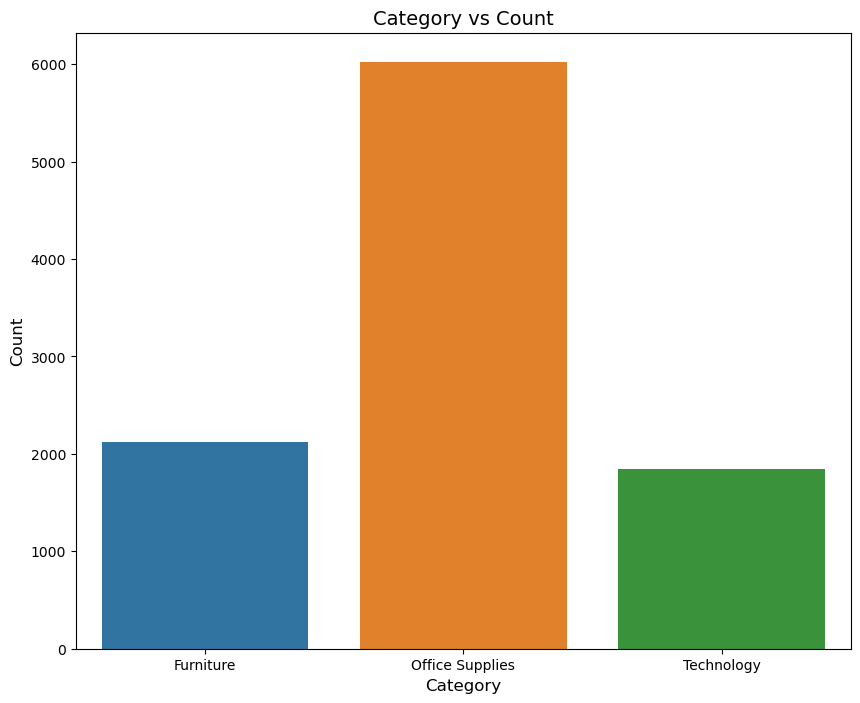

In [32]:
# Category vs Count

plt.figure(figsize=(10,8))
sns.countplot(x=merged_df['Category'])
plt.xlabel('Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Category vs Count',fontsize=14)
plt.show()


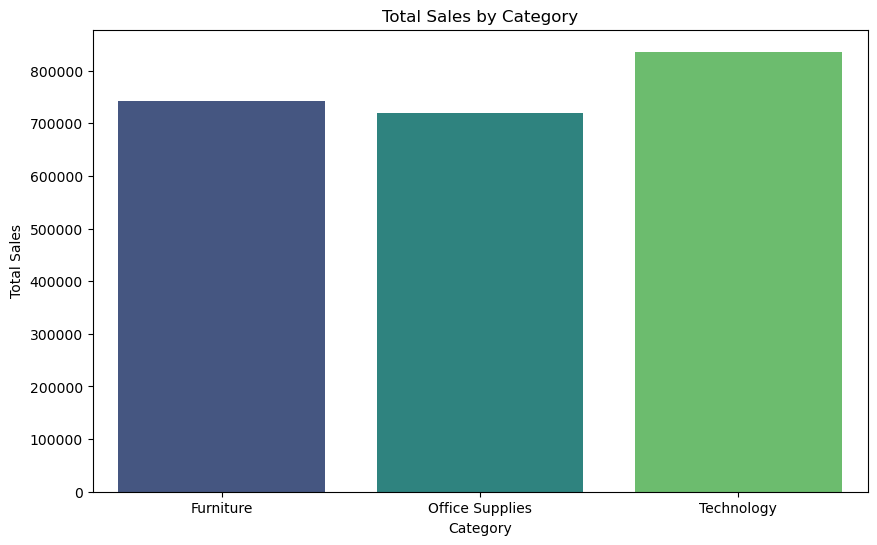

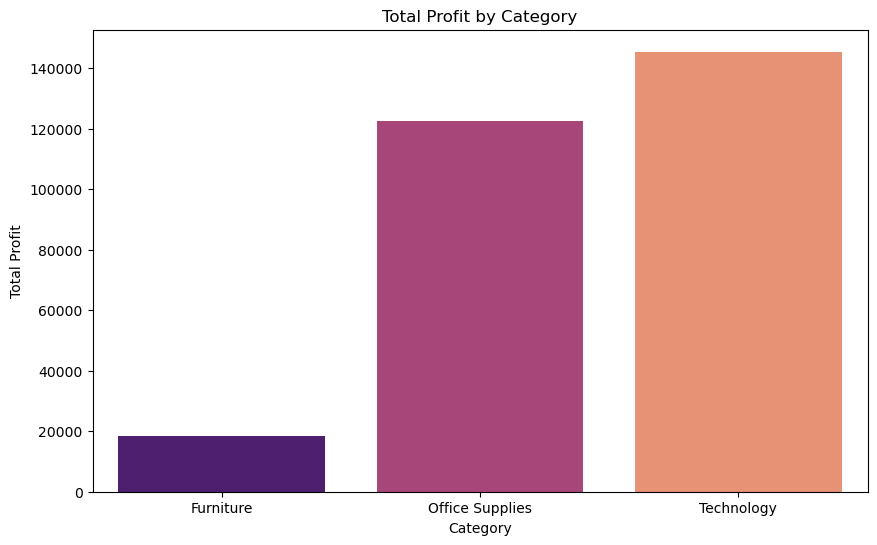

In [33]:
# Barplot for Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='Category', y='Sales', estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.show()

# Barplot for Profit by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='Category', y='Profit', estimator=sum, ci=None, palette='magma')
plt.title('Total Profit by Category')
plt.ylabel('Total Profit')
plt.show()


While Office Supplies has the highest number of orders (approximately 6,000 compared to 2,000 for Furniture and 1,800 for Technology), the Technology category generates both the highest total sales and profits, suggesting that Technology products have higher profit margins despite lower order volumes.

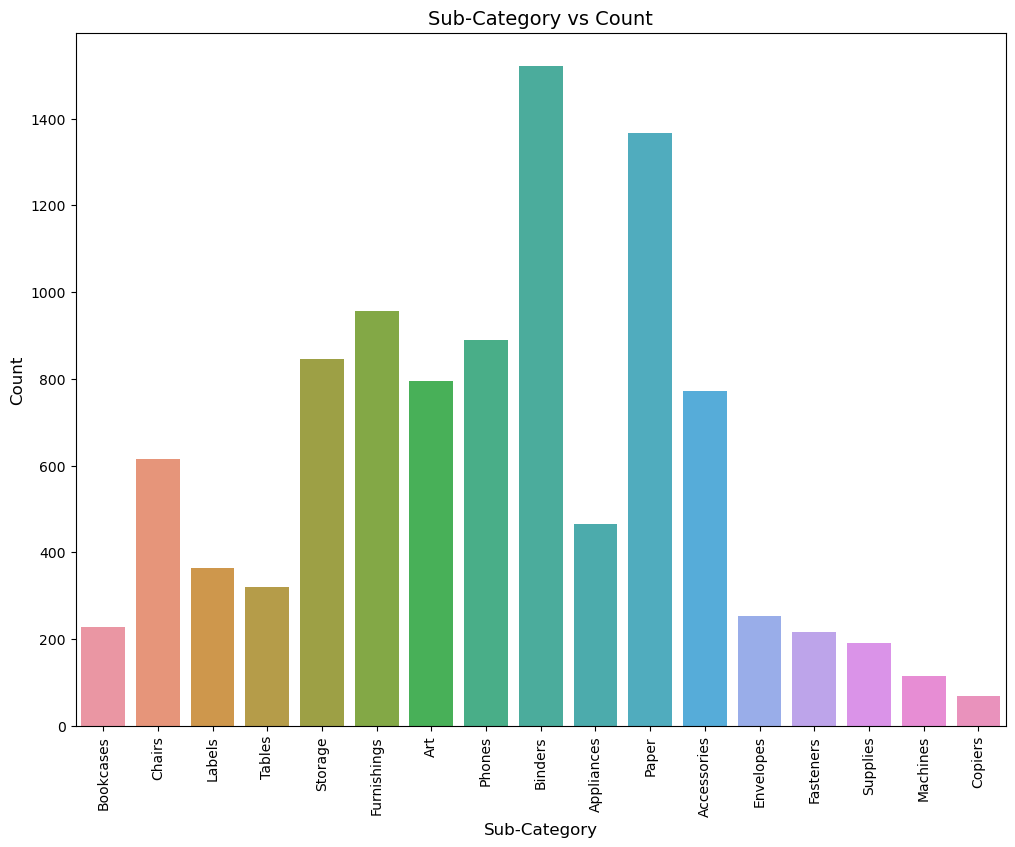

In [34]:
# Sub-Category vs Count

plt.figure(figsize=(12,9))
sns.countplot(x=merged_df['Sub-Category'])
plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Sub-Category vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

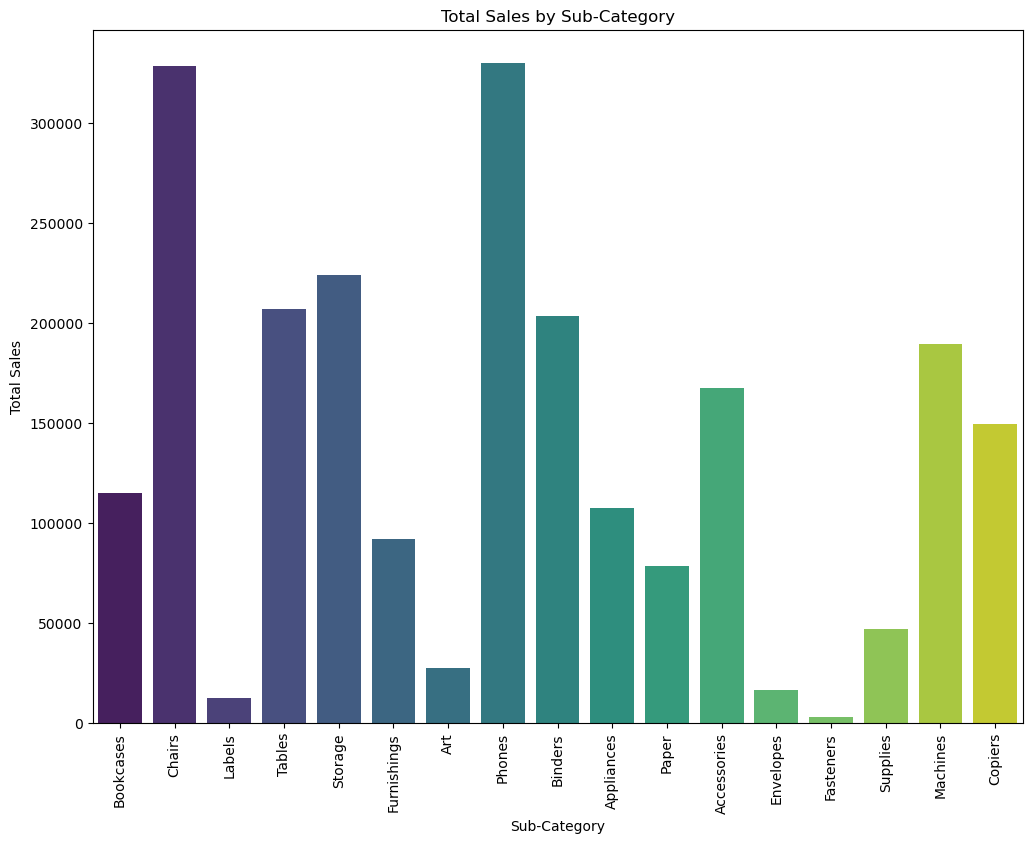

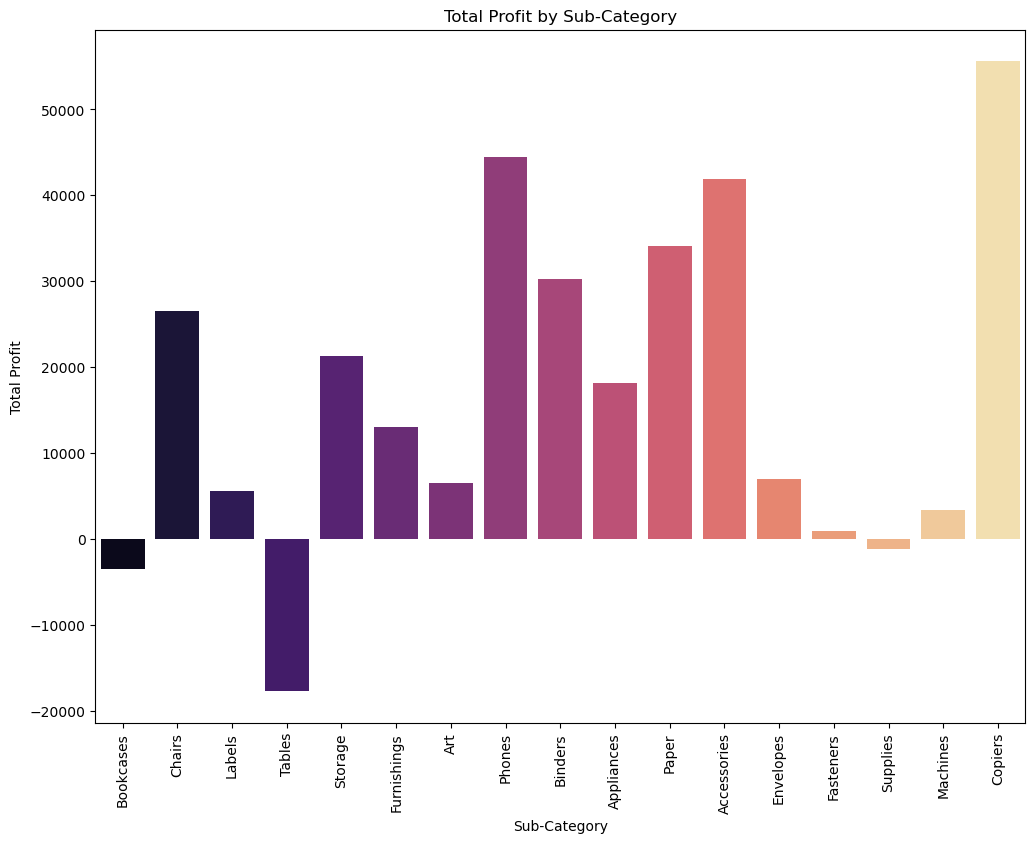

In [35]:
# Barplot for Sales by Category
plt.figure(figsize=(12, 9))
sns.barplot(data=merged_df, x='Sub-Category', y='Sales', estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation='vertical')
plt.show()

# Barplot for Profit by Category
plt.figure(figsize=(12, 9))
sns.barplot(data=merged_df, x='Sub-Category', y='Profit', estimator=sum, ci=None, palette='magma')
plt.title('Total Profit by Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation='vertical')
plt.show()

While Binders and Paper have the highest order counts (1500+ and 1400+ respectively), Chairs show the highest total sales ($330,000+) but Tables show significant losses in profit, indicating that high sales volume doesn't necessarily translate to profitability. Copiers emerge as the most profitable sub-category despite having one of the lowest order counts, suggesting they have the highest profit margins.

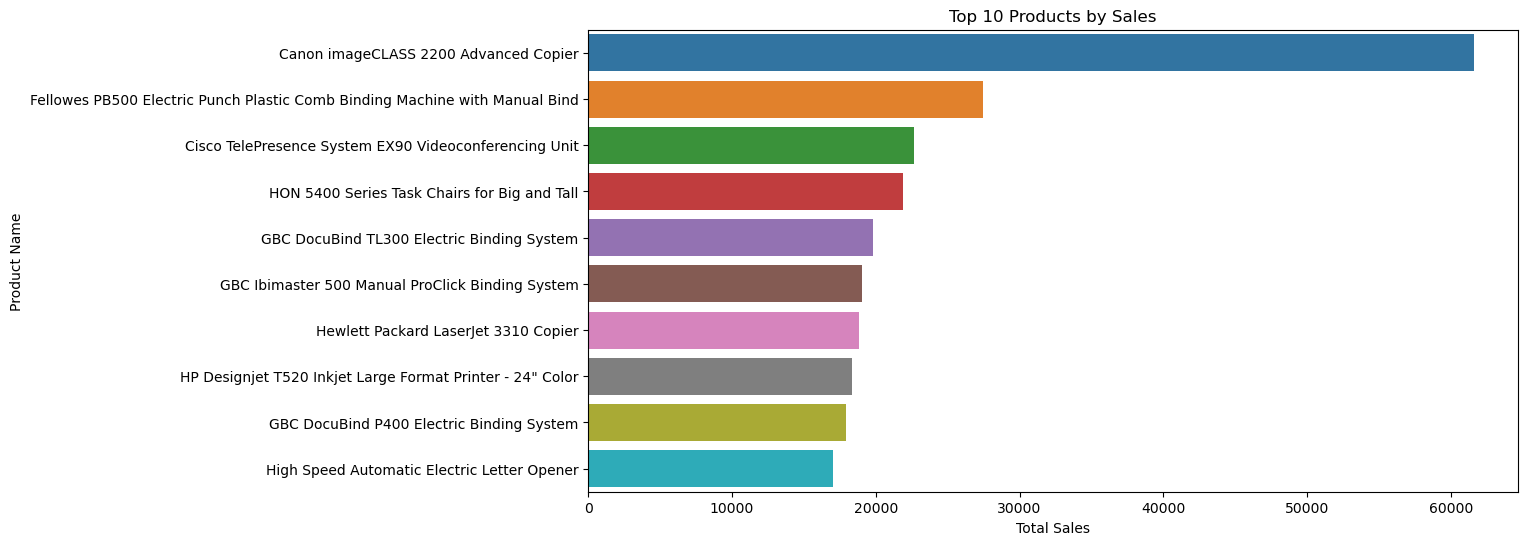

In [36]:
# Top 10 performing products
top_products = merged_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.show()

### Time-based Analysis

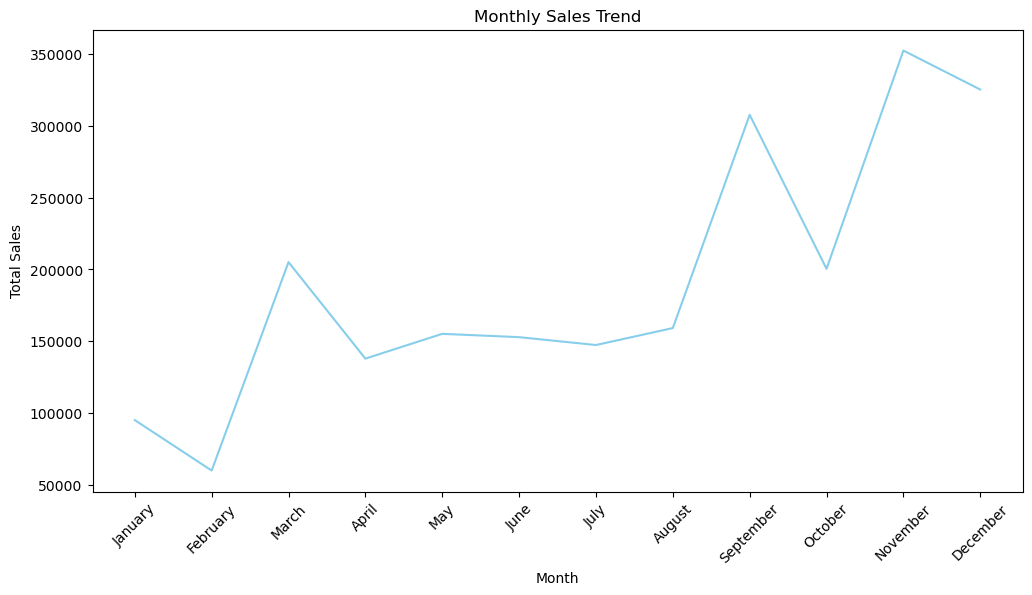

In [37]:
# Sales by Month
monthly_sales = merged_df.groupby('Month')['Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', color='skyblue')

# Explicitly set the x-axis ticks and labels
plt.xticks(ticks=range(len(monthly_sales.index)), labels=monthly_sales.index, rotation=90)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



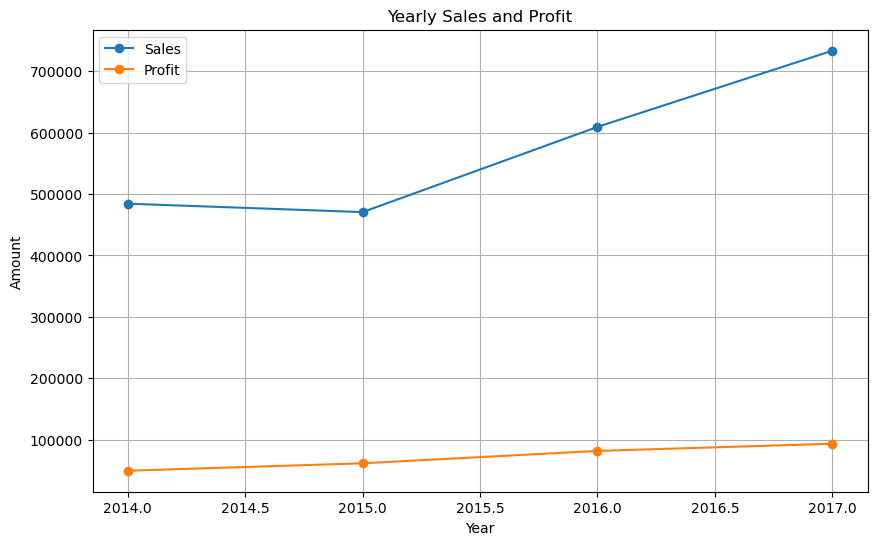

In [38]:
# Sales and Profit by Year
yearly_stats = merged_df.groupby('Year')[['Sales', 'Profit']].sum()

# Line plot for Yearly Sales and Profit
yearly_stats.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Yearly Sales and Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(['Sales', 'Profit'])
plt.grid()
plt.show()

The monthly sales trend shows significant seasonality with peaks in March, September, and November (reaching up to 350,000 in sales), while February consistently shows the lowest sales; meanwhile, the yearly trend demonstrates steady growth in both sales and profits from 2014 to 2017.

### Holiday Analysis

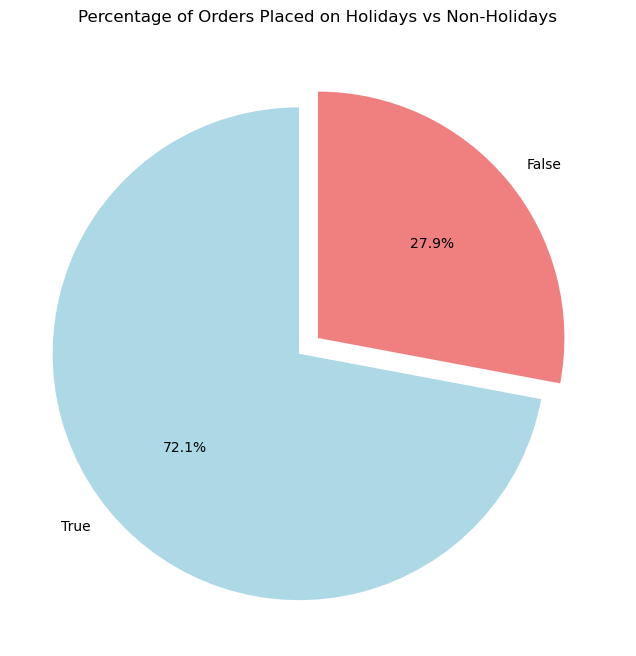

In [39]:
import matplotlib.pyplot as plt

holiday_counts = merged_df['Is Holiday'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(holiday_counts, 
        labels=holiday_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'lightcoral'], 
        explode=(0.1, 0)) 

plt.title('Percentage of Orders Placed on Holidays vs Non-Holidays')
plt.show()


### Geographic Analysis

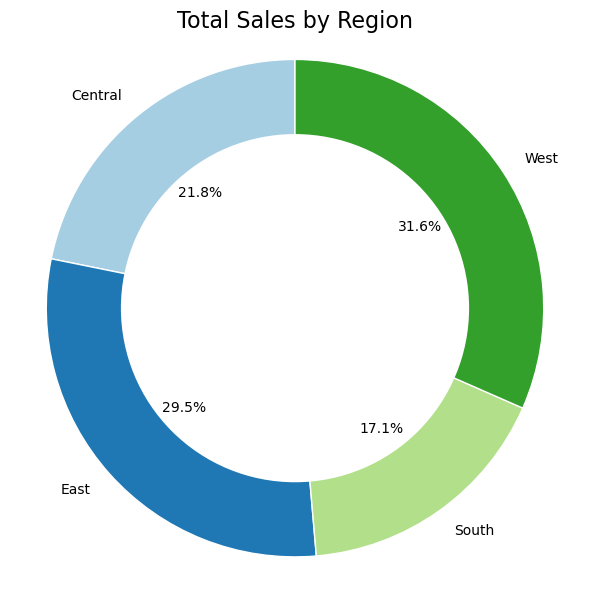

In [40]:
region_sales = merged_df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(6, 6))
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', 
        startangle=90, colors=plt.cm.Paired.colors, 
        wedgeprops=dict(width=0.7, edgecolor='white'))

plt.title('Total Sales by Region', fontsize=16)
plt.axis('equal')  

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.tight_layout()
plt.show()



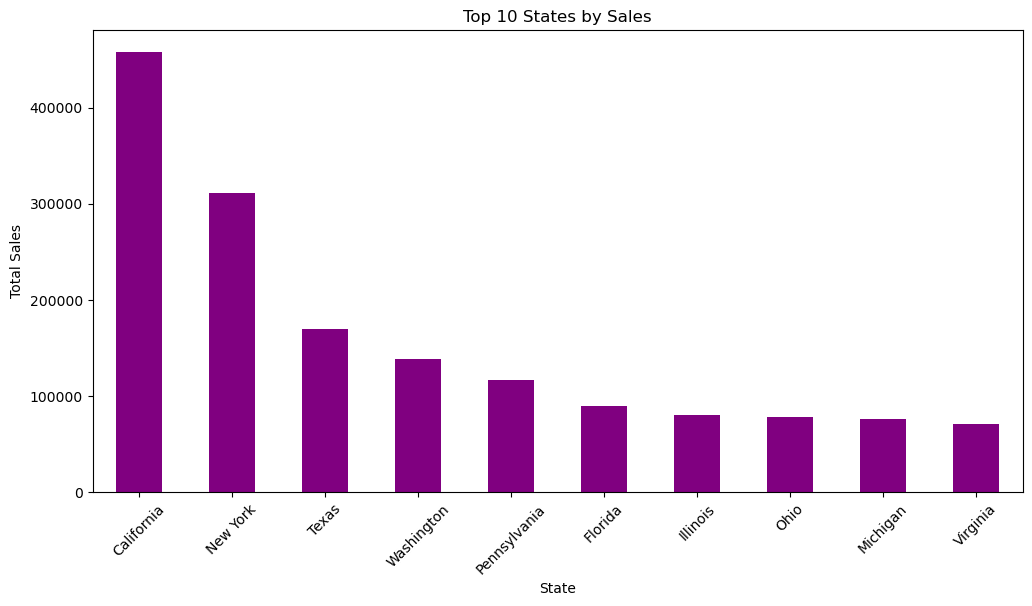

In [41]:
# Top 10 States by Sales
top_states = merged_df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', color='purple')
plt.title('Top 10 States by Sales')
plt.ylabel('Total Sales')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()


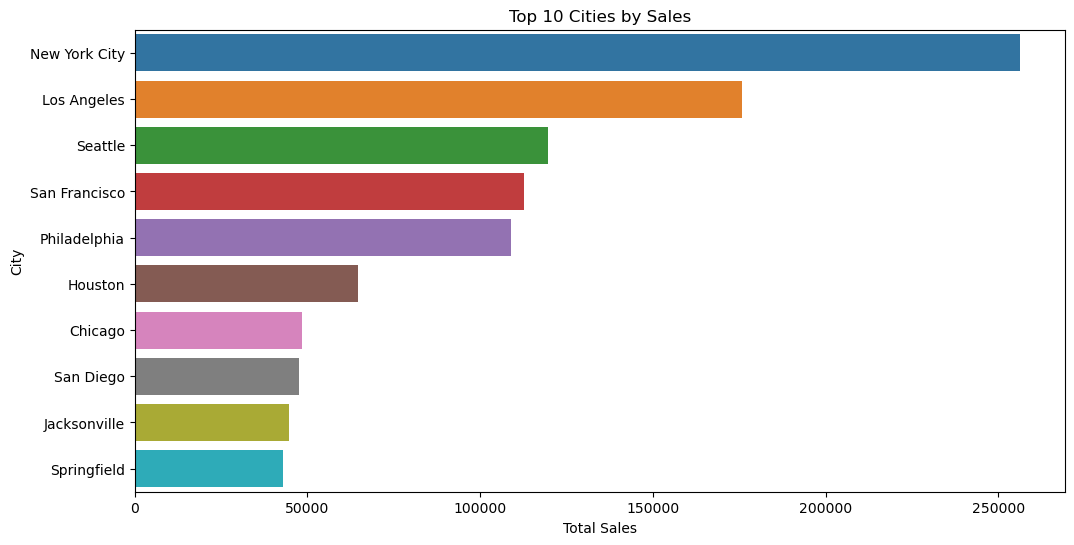

In [42]:
# Top 10 performing stores
top_cities = merged_df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales')
plt.show()

In [43]:
# Creating store performance metrics
store_performance = merged_df.groupby(['City', 'State']).agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Order ID': 'count'
}).reset_index()

store_performance.columns = ['City', 'State', 'Sales_sum', 'Sales_mean', 'Profit_sum', 'Profit_mean', 'Order_count']

# Sorting by Sales_sum to identify top and bottom performing stores
top_stores = store_performance.nlargest(10, 'Sales_sum')
bottom_stores = store_performance.nsmallest(10, 'Sales_sum')

In [44]:
top_stores

,City,State,Sales_sum,Sales_mean,Profit_sum,Profit_mean,Order_count
380,New York City,New York,256368.1610,280.490329,62036.9837,67.874162,914
312,Los Angeles,California,175851.3410,235.410095,30440.7579,40.750680,747
517,Seattle,Washington,119540.7420,279.300799,29156.0967,68.121721,428
503,San Francisco,California,112669.0920,220.919788,17507.3854,34.328207,510
430,Philadelphia,Pennsylvania,109077.0130,203.122929,-13837.7674,-25.768654,537
239,Houston,Texas,64504.7604,171.100160,-10153.5485,-26.932489,377
90,Chicago,Illinois,48539.5410,154.584525,-6654.5688,-21.192894,314
502,San Diego,California,47521.0290,279.535465,6377.1960,37.512918,170
143,Detroit,Michigan,42446.9440,369.103861,13181.7908,114.624268,115
251,Jacksonville,Florida,39133.3280,521.777707,-2445.6608,-32.608811,75


In [45]:
bottom_stores

,City,State,Sales_sum,Sales_mean,Profit_sum,Profit_mean,Order_count
1,Abilene,Texas,1.392,1.392,-3.7584,-3.7584,1
162,Elyria,Ohio,1.824,1.824,-1.3984,-1.3984,1
257,Jupiter,Florida,2.064,2.064,0.1548,0.1548,1
425,Pensacola,Florida,2.214,2.214,-1.4760,-1.4760,1
408,Ormond Beach,Florida,2.808,2.808,-1.9656,-1.9656,1
506,San Luis Obispo,California,3.620,3.620,1.1946,1.1946,1
169,Everett,Washington,3.856,3.856,1.3978,1.3978,1
27,Auburn,Washington,4.180,4.180,1.5048,1.5048,1
529,Springdale,Arkansas,4.300,4.300,1.4190,1.4190,1
293,Layton,Utah,4.960,4.960,2.3312,2.3312,1


### Customer Analysis

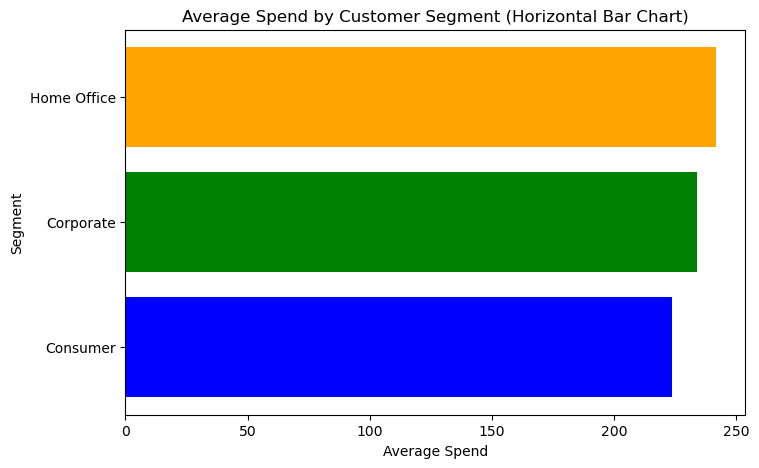

In [46]:
# Average spend by segment
segment_avg_spend = merged_df.groupby('Segment')['Sales'].mean()

plt.figure(figsize=(8, 5))
plt.barh(segment_avg_spend.index, segment_avg_spend.values, color=['blue', 'green', 'orange'])
plt.title('Average Spend by Customer Segment (Horizontal Bar Chart)')
plt.xlabel('Average Spend')
plt.ylabel('Segment')
plt.show()


The horizontal bar chart shows Home Office customers have the highest average spend (~250) followed closely by Corporate and Consumer segments.

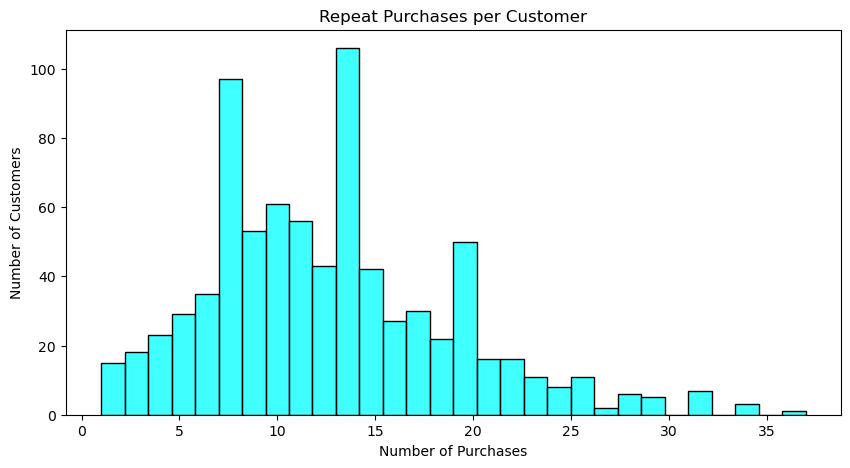

In [47]:
# Count of repeat purchases per customer
repeat_customers = merged_df['Customer ID'].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(repeat_customers, bins=30, kde=False, color='cyan')
plt.title('Repeat Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()



The histogram of repeat purchases reveals that most customers make between 8-15 purchases, with a peak at around 15 purchases, indicating a healthy pattern of customer retention and repeat business.

In [48]:
# Calculating average spend per customer
customer_avg_spend = df.groupby('Customer ID')['Sales'].mean()

customer_avg_spend_df = customer_avg_spend.reset_index()
customer_avg_spend_df = customer_avg_spend_df.merge(
    df[['Customer ID', 'Customer Name']].drop_duplicates(),
    on='Customer ID',
    how='left'
)

customer_avg_spend_df.columns = ['Customer ID', 'Average Spend', 'Customer Name']
top_10_customers = customer_avg_spend_df.sort_values(by='Average Spend', ascending=False).head(10)

print(top_10_customers)


    Customer ID  Average Spend         Customer Name
547    MW-18235    1751.292000      Mitch Willingham
700    SM-20320    1669.536667           Sean Miller
741    TC-20980    1587.684833          Tamara Chand
310    GT-14635    1558.535333        Grant Thornton
730    TA-21385    1459.562000          Tom Ashbrook
327    HL-15040    1170.299818          Hunter Lopez
104    BS-11365    1166.850333          Bill Shonely
131    CC-12370    1102.642909    Christopher Conant
693    SH-20635    1048.196000     Stefanie Holloman
160    CM-12385     895.402000  Christopher Martinez


### Correlation Analysis

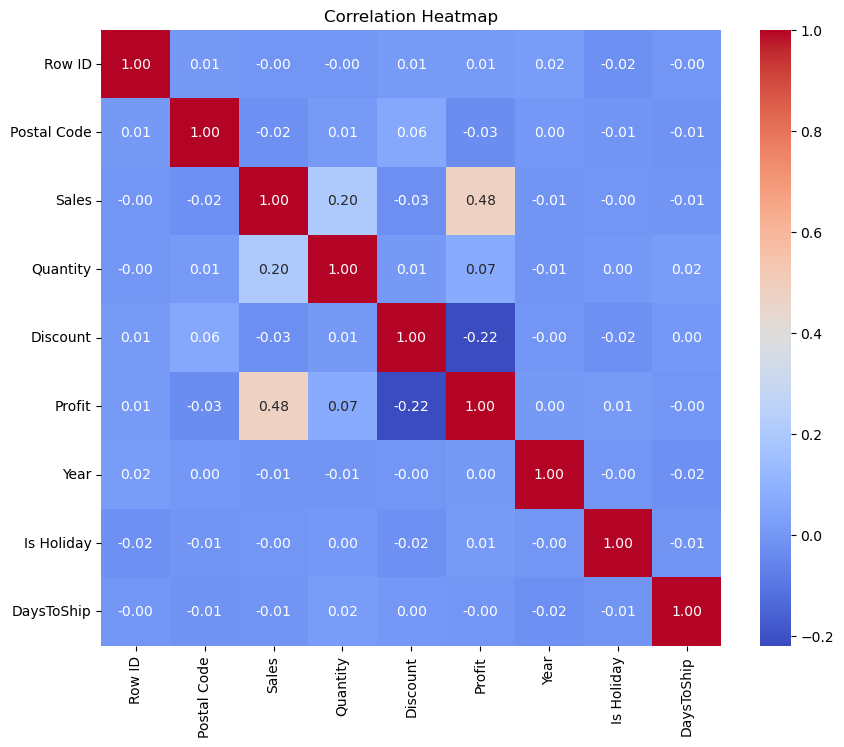

In [49]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals a moderate positive correlation (0.48) between Sales and Profit, while showing a notable negative correlation (-0.22) between Discount and Profit, suggesting that higher discounts tend to reduce profitability.

### Shipping Analysis

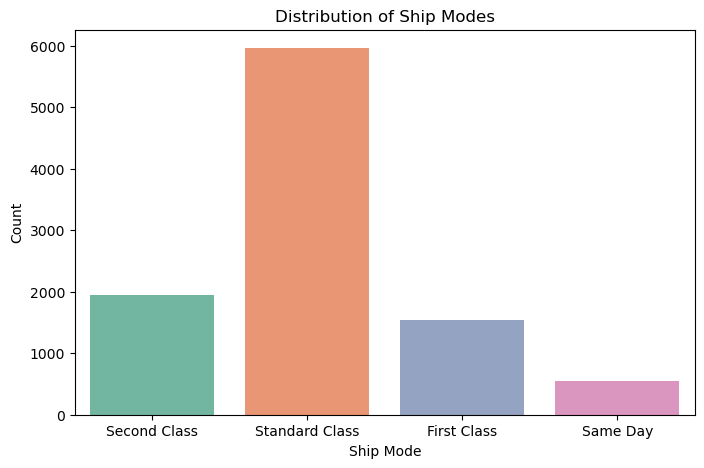

In [50]:

# Count plot for Ship Mode
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='Ship Mode', palette='Set2')
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()


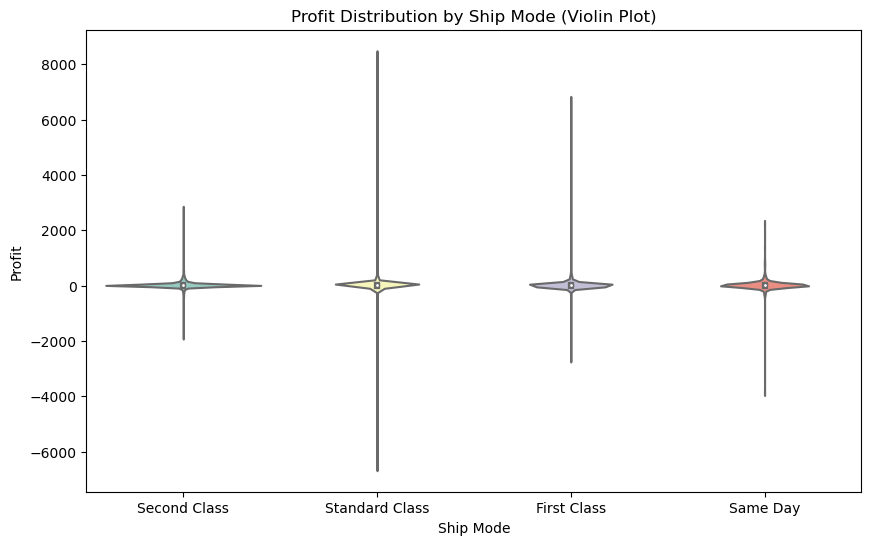

In [51]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_df, x='Ship Mode', y='Profit', palette='Set3')
plt.title('Profit Distribution by Ship Mode (Violin Plot)')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.show()


The violin plot shows profit distribution across four shipping modes (Second Class, Standard Class, First Class, and Same Day). All shipping modes have median profits near zero, but Standard Class shows the widest profit range and most variability, while Same Day shipping has the narrowest range but more consistent profits.

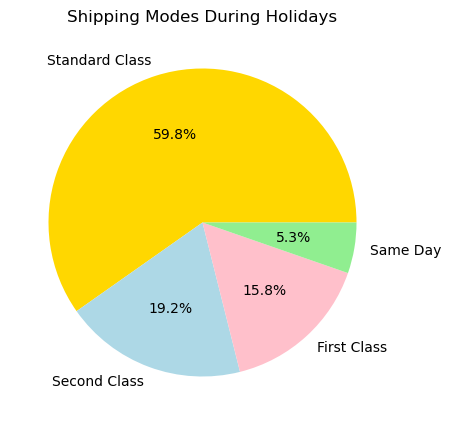

In [52]:
# Count of Ship Modes on Holidays
holiday_shipping = merged_df[merged_df['Is Holiday'] == True]['Ship Mode'].value_counts()

plt.figure(figsize=(8, 5))
holiday_shipping.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightblue', 'pink', 'lightgreen'])
plt.title('Shipping Modes During Holidays')
plt.ylabel('')
plt.show()

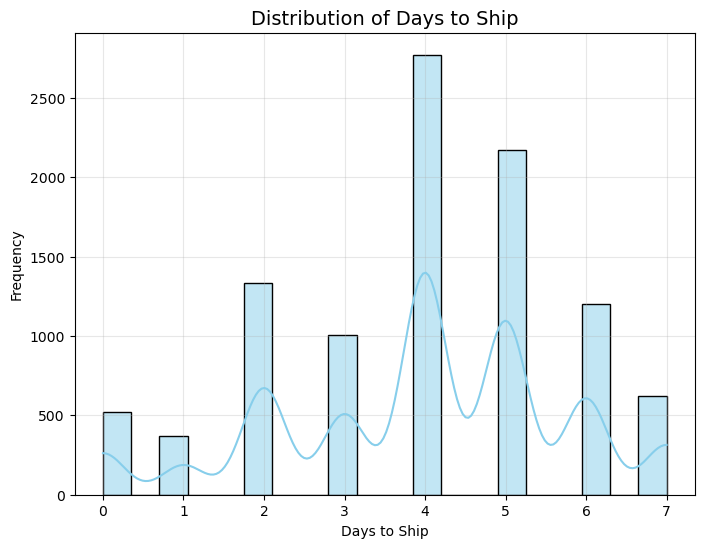

In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['DaysToShip'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Days to Ship', fontsize=14)
plt.xlabel('Days to Ship')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()


The distribution of shipping days shows that 4-day shipping is the most common with around 2,700 orders, followed by 5-day shipping with about 2,100 orders, while same-day (0 days) and next-day shipping are used less frequently.

### Impact of Discounts

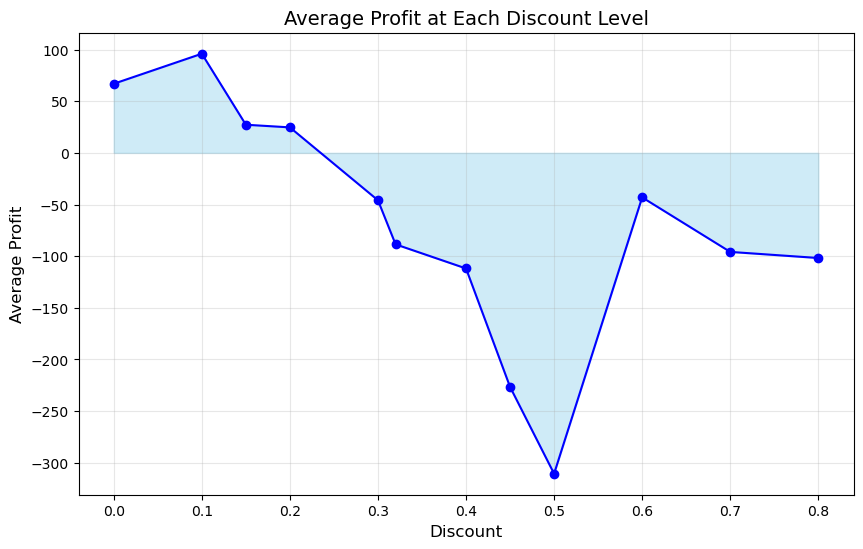

In [54]:
avg_profit_discount = merged_df.groupby('Discount', as_index=False)['Profit'].mean()

# Plotting the data as an area chart
plt.figure(figsize=(10, 6))
plt.fill_between(avg_profit_discount['Discount'], avg_profit_discount['Profit'], color='skyblue', alpha=0.4)
plt.plot(avg_profit_discount['Discount'], avg_profit_discount['Profit'], marker='o', color='b')
plt.title('Average Profit at Each Discount Level', fontsize=14)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Average Profit', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


The graph reveals that higher discount levels (particularly around 50%) tend to result in significant profit losses, while lower discounts (0-20%) generally maintain positive profit margins.

## Advanced Analysis

### Moving Averages 

In [55]:
# Extract month-year from Order Date and aggregate sales
monthly_sales = merged_df.groupby(merged_df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales = pd.DataFrame(monthly_sales)
monthly_sales['time'] = np.arange(len(monthly_sales.index))


In [56]:
monthly_sales.head()

,Sales,time
Order Date,,
2014-01,14236.895,0
2014-02,4519.892,1
2014-03,55691.009,2
2014-04,28295.345,3
2014-05,23648.287,4


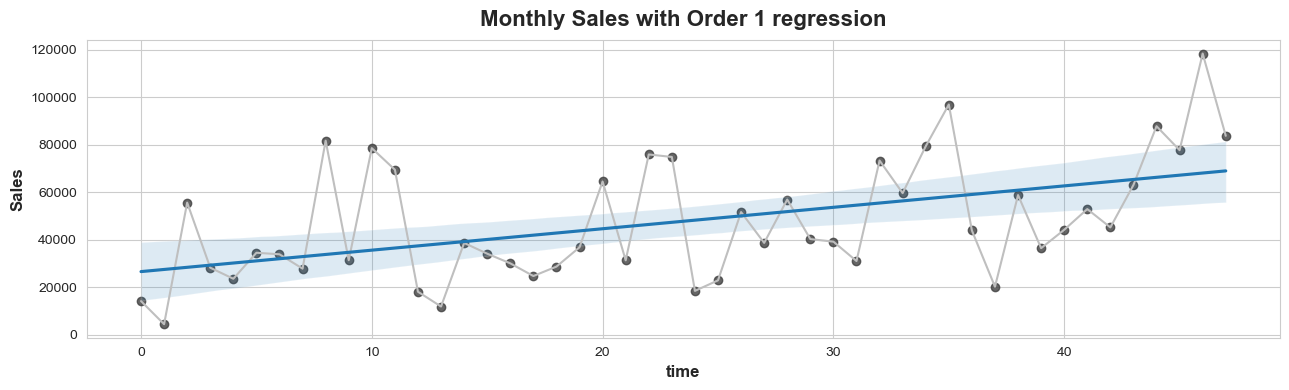

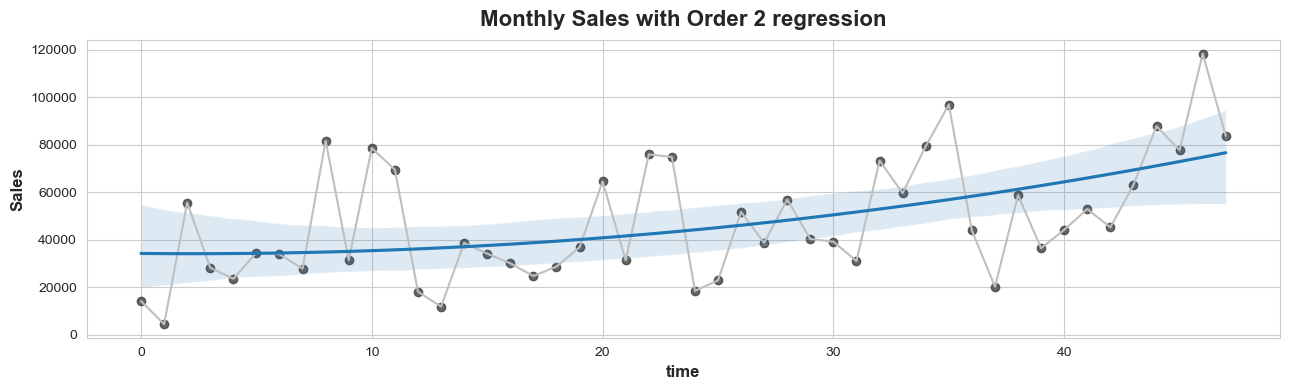

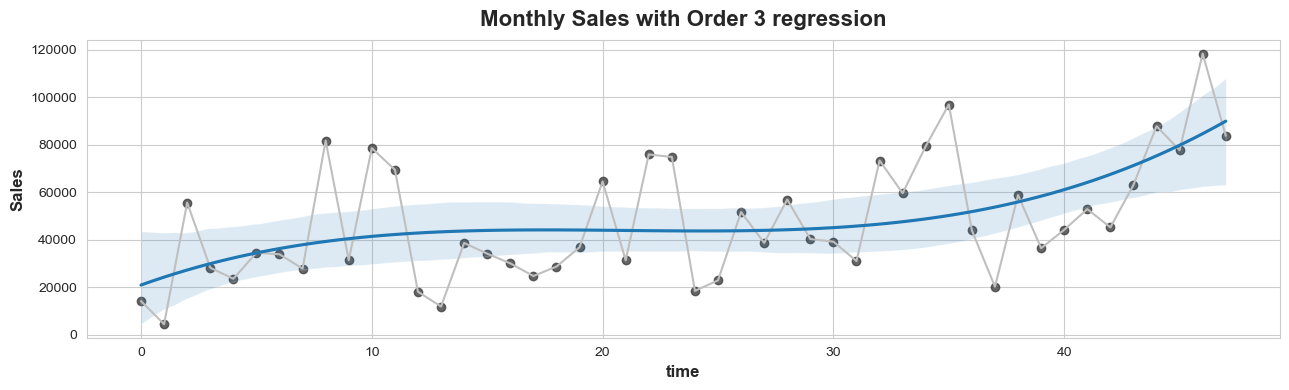

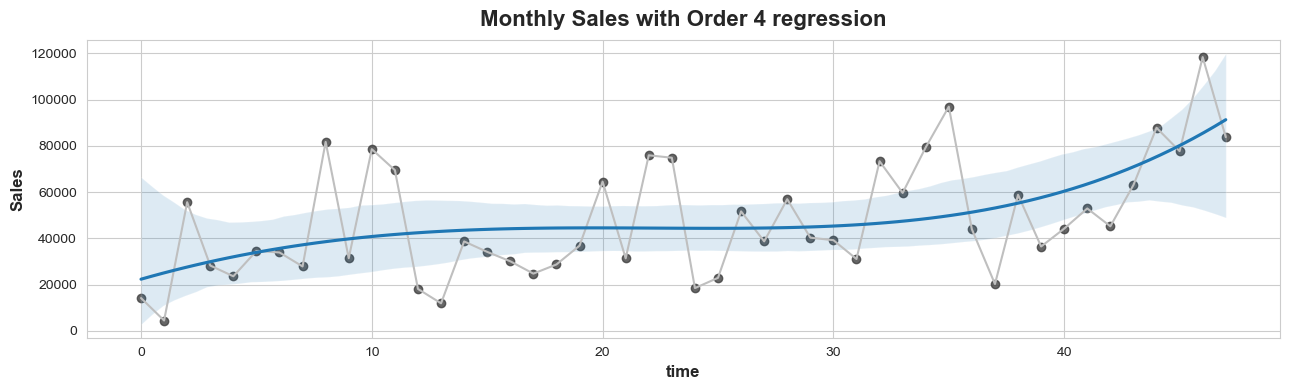

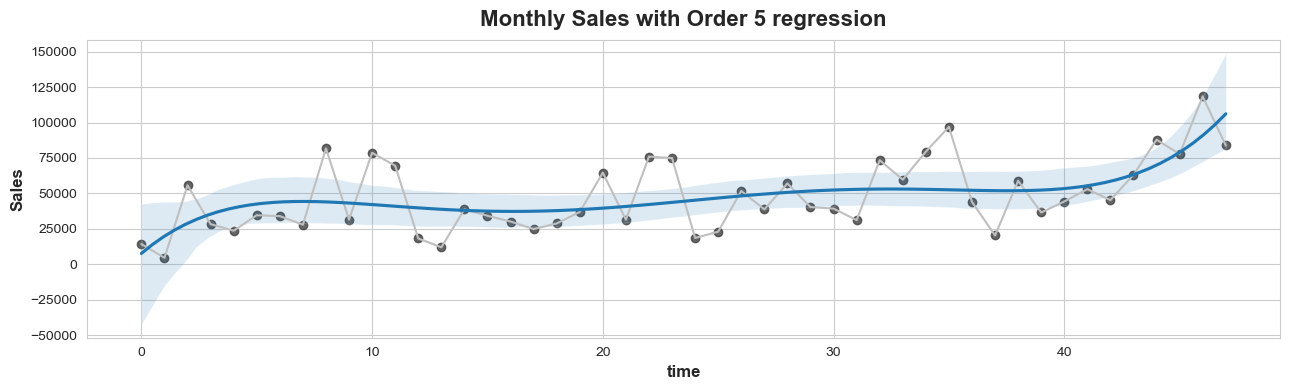

In [57]:
# Function to plot trend with regression
def plot_trend(order=1):
    sns.set_style('whitegrid')
    plt.rc('figure', autolayout=True, figsize=(13,4), titlesize=18, titleweight='bold')
    plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=16, titlepad=10)
    
    fig, ax = plt.subplots()
    ax.plot(monthly_sales['time'], monthly_sales['Sales'], color='0.75')
    ax = sns.regplot(data=monthly_sales, x='time', y='Sales', scatter_kws=dict(color='0.25'), order=order)
    
    ax.set_title(f'Monthly Sales with Order {order} regression')

for order in range(1, 6):
    plot_trend(order)

<Axes: title={'center': 'Moving Average'}, xlabel='Order Date'>

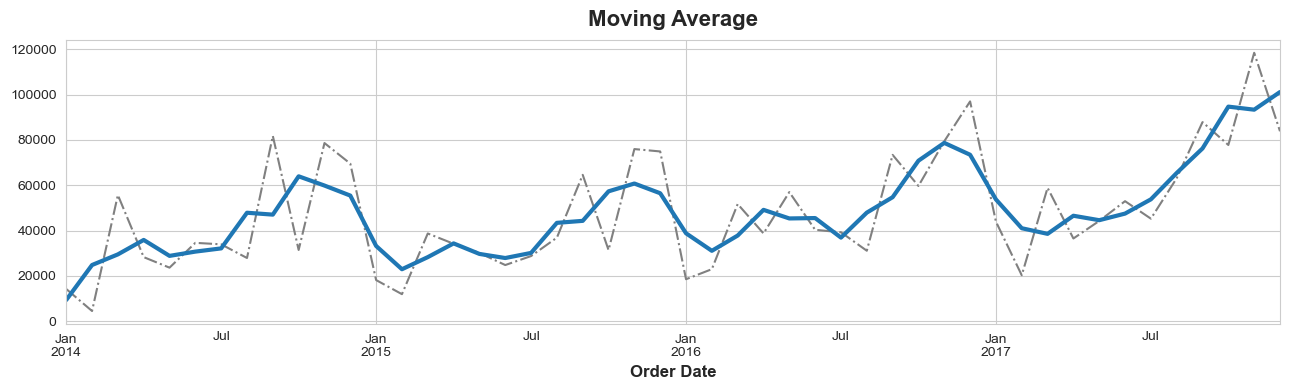

In [58]:
# Calculating moving average for sales
moving_average = monthly_sales['Sales'].rolling(window=3, center=True, min_periods=1).mean()

# Plotting the sales with moving average
ax = monthly_sales['Sales'].plot(style="-.", color="0.5")
ax.set_title('Moving Average')
moving_average.plot(ax=ax, linewidth=3)


### Linear Regression

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

monthly_sales['time'] = np.arange(len(monthly_sales.index))  
monthly_sales['month'] = monthly_sales.index.month  

# One-hot encode the 'month' column
month_dummies = pd.get_dummies(monthly_sales['month'], prefix='month', drop_first=True)

X = pd.concat([monthly_sales[['time']], month_dummies], axis=1)
y = monthly_sales['Sales']

# Splitting the data into training (2016 and earlier) and testing (2017)
X_train = X.loc[:'2016-12']
X_test = X.loc['2017-01':]
y_train = y.loc[:'2016-12']
y_test = y.loc['2017-01':]

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on training and test data
y_pred_train = pd.Series(model.predict(X_train), index=X_train.index)
y_pred_test = pd.Series(model.predict(X_test), index=X_test.index)

# Forecasting for future months (2019)
future_time = np.arange(len(X), len(X) + 12)  # Trend for 2019
future_months = np.tile(np.arange(1, 13), len(future_time) // 12 + 1)[:12]  # Seasonality for 2019
future_month_dummies = pd.get_dummies(future_months, prefix='month', drop_first=True)

# Creating future feature DataFrame
X_future = pd.concat([pd.Series(future_time, name='time'), future_month_dummies], axis=1)
X_future = X_future.reindex(columns=X.columns, fill_value=0)  # Align columns with training data

y_forecast = pd.Series(model.predict(X_future), index=pd.date_range(start='2018-01', periods=12, freq='MS'))


Linear Regression-Training Data Metrics:
R²: 0.9108
MAE: 5555.26
MSE: 47241247.43
RMSE: 6873.23

 Linear Regression-Test Data Metrics:
R²: 0.6810
MAE: 10793.89
MSE: 211930903.02
RMSE: 14557.85


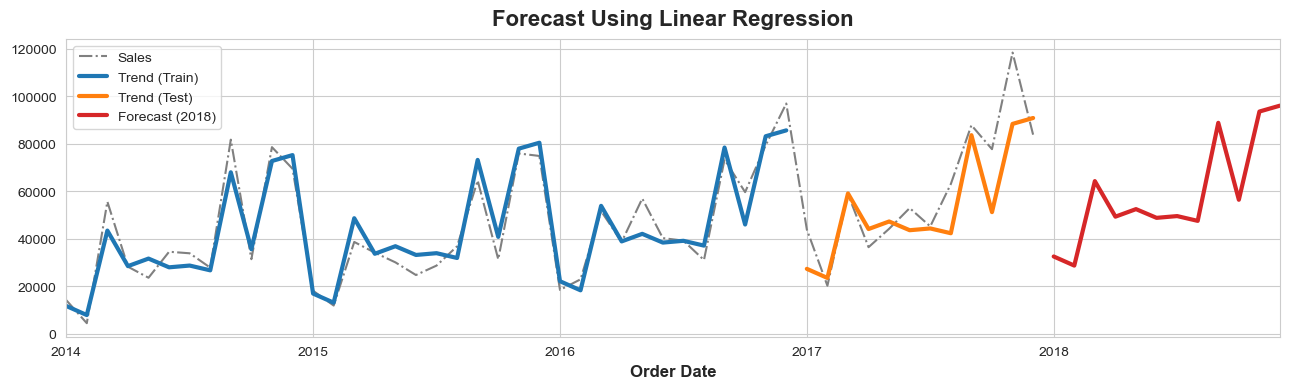

In [61]:
# Calculating evaluation metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Print the metrics
print("Linear Regression-Training Data Metrics:")
print(f"R²: {r2_score(y_train, y_pred_train):.4f}")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")

print("\n Linear Regression-Test Data Metrics:")
print(f"R²: {r2_score(y_test, y_pred_test):.4f}")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")

# Plot actual vs predicted values
ax = monthly_sales['Sales'].plot(style="-.", color="0.5", title="Forecast Using Linear Regression")
y_pred_train.plot(ax=ax, linewidth=3, label="Trend (Train)")
y_pred_test.plot(ax=ax, linewidth=3, label="Trend (Test)")
y_forecast.plot(ax=ax, linewidth=3, label="Forecast (2018)", color='C3')
plt.legend()
plt.show()


### Linear Regression with AdaBoost

AdaBoost Evaluation Metrics:
Training Data:
R² for Train Data: 0.9233
Mean Absolute Error (MAE): 4942.00
Mean Squared Error (MSE): 40593044.02
Root Mean Squared Error (RMSE): 6371.27
Mean Absolute Percentage Error (MAPE): 15.07%

Test Data:
R² for Test Data: 0.6581
Mean Absolute Error (MAE): 11166.77
Mean Squared Error (MSE): 227128671.00
Root Mean Squared Error (RMSE): 15070.79
Mean Absolute Percentage Error (MAPE): 17.45%


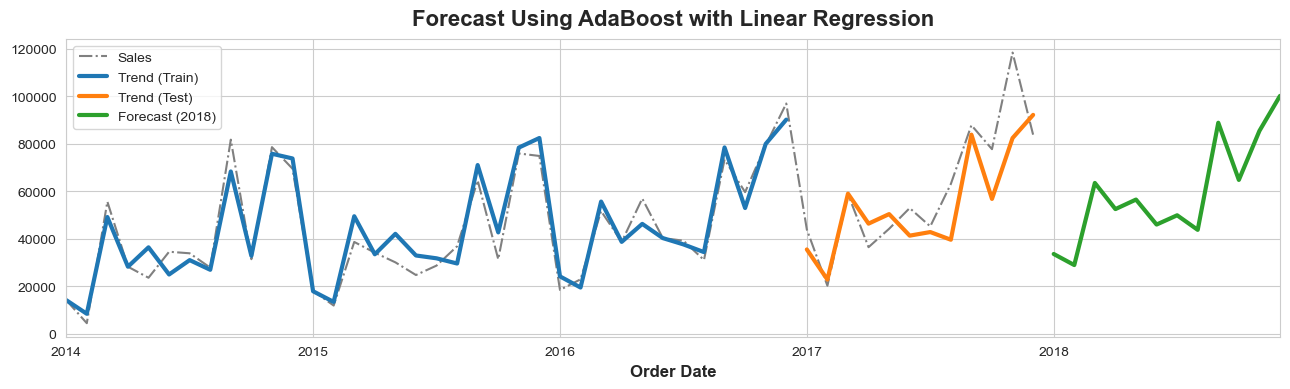

In [62]:
from sklearn.ensemble import AdaBoostRegressor

# Defining the AdaBoost model with Linear Regression as the base estimator
ada_model = AdaBoostRegressor(estimator=LinearRegression(), n_estimators=50, random_state=42)

# Fit the model on training data
ada_model.fit(X_train, y_train)

# Predict on training and test data
y_pred_train_ada = pd.Series(ada_model.predict(X_train), index=X_train.index)
y_pred_test_ada = pd.Series(ada_model.predict(X_test), index=X_test.index)

# Forecast for future months (2018)
y_forecast_ada = pd.Series(ada_model.predict(X_future), index=pd.date_range(start='2018-01', periods=12, freq='MS'))

# Evaluate the model using R² and other metrics for both training and test data
mae_train_ada = mean_absolute_error(y_train, y_pred_train_ada)
mse_train_ada = mean_squared_error(y_train, y_pred_train_ada)
rmse_train_ada = np.sqrt(mse_train_ada)
mape_train_ada = np.mean(np.abs((y_train - y_pred_train_ada) / y_train)) * 100

mae_test_ada = mean_absolute_error(y_test, y_pred_test_ada)
mse_test_ada = mean_squared_error(y_test, y_pred_test_ada)
rmse_test_ada = np.sqrt(mse_test_ada)
mape_test_ada = np.mean(np.abs((y_test - y_pred_test_ada) / y_test)) * 100

# Print the evaluation metrics for training and testing data
print('AdaBoost Evaluation Metrics:')
print(f'Training Data:')
print(f'R² for Train Data: {r2_score(y_train, y_pred_train_ada):.4f}')
print(f'Mean Absolute Error (MAE): {mae_train_ada:.2f}')
print(f'Mean Squared Error (MSE): {mse_train_ada:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train_ada:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_train_ada:.2f}%')

print(f'\nTest Data:')
print(f'R² for Test Data: {r2_score(y_test, y_pred_test_ada):.4f}')
print(f'Mean Absolute Error (MAE): {mae_test_ada:.2f}')
print(f'Mean Squared Error (MSE): {mse_test_ada:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test_ada:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_test_ada:.2f}%')

# Plot actual vs predicted values for AdaBoost
ax = monthly_sales['Sales'].plot(style="-.", color="0.5", title="Forecast Using AdaBoost with Linear Regression")
y_pred_train_ada.plot(ax=ax, linewidth=3, label="Trend (Train)")
y_pred_test_ada.plot(ax=ax, linewidth=3, label="Trend (Test)")
y_forecast_ada.plot(ax=ax, linewidth=3, label="Forecast (2018)", color='C2')
plt.legend()
plt.show()


### Ridge Regression (L2 Regularization)

In [63]:
# Creating Ridge regression model with a specific alpha (regularization strength)
ridge_model = Ridge(alpha=1.0)  

ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

# Calculating evaluation metrics
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)

mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

# Print the evaluation metrics
print('Ridge Regression Evaluation Metrics:')
print(f'Training Data:')
print(f'R²: {r2_train_ridge:.4f}')
print(f'MAE: {mae_train_ridge:.2f}')
print(f'MSE: {mse_train_ridge:.2f}')
print(f'RMSE: {rmse_train_ridge:.2f}')

print(f'\nTest Data:')
print(f'R²: {r2_test_ridge:.4f}')
print(f'MAE: {mae_test_ridge:.2f}')
print(f'MSE: {mse_test_ridge:.2f}')
print(f'RMSE: {rmse_test_ridge:.2f}')


Ridge Regression Evaluation Metrics:
Training Data:
R²: 0.8047
MAE: 7868.20
MSE: 103421600.66
RMSE: 10169.64

Test Data:
R²: 0.6958
MAE: 11010.09
MSE: 202046853.88
RMSE: 14214.32


In [64]:
# Defining the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a Ridge model
ridge = Ridge()

# Perform grid search
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f'Best Alpha: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')


Best Alpha: {'alpha': 0.1}
Best Cross-Validation Score: 0.6137346766462815


In [65]:
# Use the best alpha (0.1) found through cross-validation
best_alpha = 0.1
ridge_model_best = Ridge(alpha=best_alpha)

# Fit the model on training data
ridge_model_best.fit(X_train, y_train)

# Predict on training and test data
y_pred_train_best = ridge_model_best.predict(X_train)
y_pred_test_best = ridge_model_best.predict(X_test)

# Calculate evaluation metrics
mae_train_best = mean_absolute_error(y_train, y_pred_train_best)
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
rmse_train_best = np.sqrt(mse_train_best)
r2_train_best = r2_score(y_train, y_pred_train_best)

mae_test_best = mean_absolute_error(y_test, y_pred_test_best)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)
rmse_test_best = np.sqrt(mse_test_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

# Print the evaluation metrics for the best model
print(f'Ridge Regression (Best Alpha = {best_alpha}) Evaluation Metrics:')
print(f'Training Data:')
print(f'R²: {r2_train_best:.4f}')
print(f'MAE: {mae_train_best:.2f}')
print(f'MSE: {mse_train_best:.2f}')
print(f'RMSE: {rmse_train_best:.2f}')

print(f'\nTest Data:')
print(f'R²: {r2_test_best:.4f}')
print(f'MAE: {mae_test_best:.2f}')
print(f'MSE: {mse_test_best:.2f}')
print(f'RMSE: {rmse_test_best:.2f}')


Ridge Regression (Best Alpha = 0.1) Evaluation Metrics:
Training Data:
R²: 0.9017
MAE: 5815.34
MSE: 52051526.05
RMSE: 7214.67

Test Data:
R²: 0.7118
MAE: 10159.93
MSE: 191414268.14
RMSE: 13835.25


## Customer Clustering

In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

customer_data = merged_df.groupby('Customer ID').agg({
    'Sales': 'sum',  # Total sales
    'Quantity': 'sum',  # Total quantity purchased
    'Discount': 'mean',  # Average discount
    'Profit': 'sum'  # Total profit
}).reset_index()

features = customer_data[['Sales', 'Quantity', 'Discount', 'Profit']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

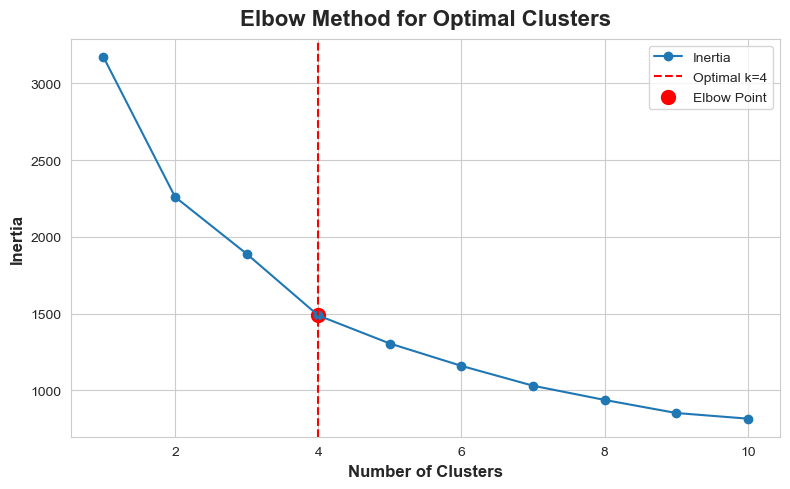

In [67]:
from kneed import KneeLocator

# Determining the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    
# Finding the elbow point programmatically
knee_locator = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee


# Plotting the Elbow Curve with the optimal number of clusters marked
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', label='Inertia')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.scatter(optimal_k, inertia[optimal_k - 1], color='red', s=100, label='Elbow Point')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

In [68]:
# Appling K-Means Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

# Analyzing clusters
cluster_analysis = customer_data.groupby('Cluster').mean()
print(cluster_analysis)


               Sales   Quantity  Discount       Profit
Cluster                                               
0        3962.260448  72.360360  0.158337   382.664373
1        1631.656106  34.704762  0.258088  -104.115794
2        9407.638309  74.620690  0.117837  2233.538164
3        1746.825864  33.640264  0.094808   309.454238


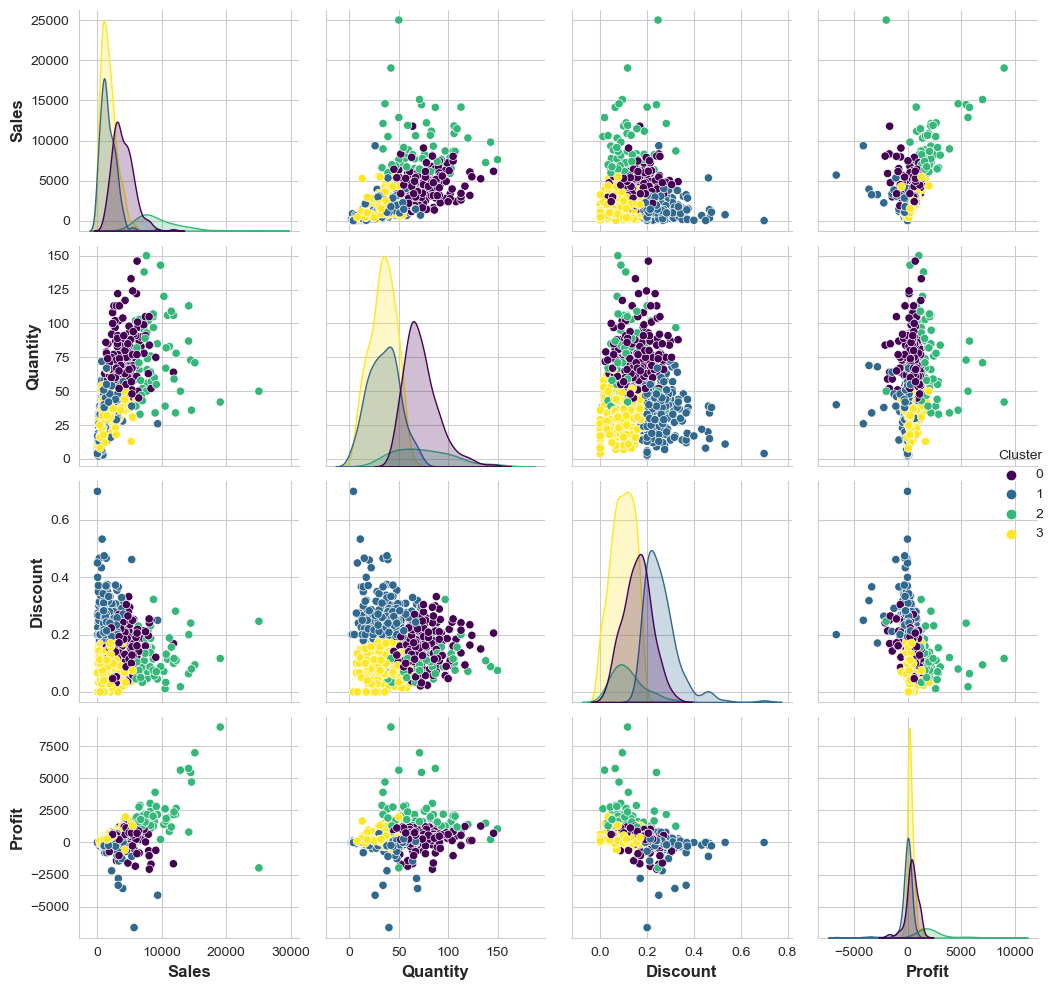

In [69]:
# Visualize clusters
sns.pairplot(customer_data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

### Categorizing customers based on their spending and types of products purchased

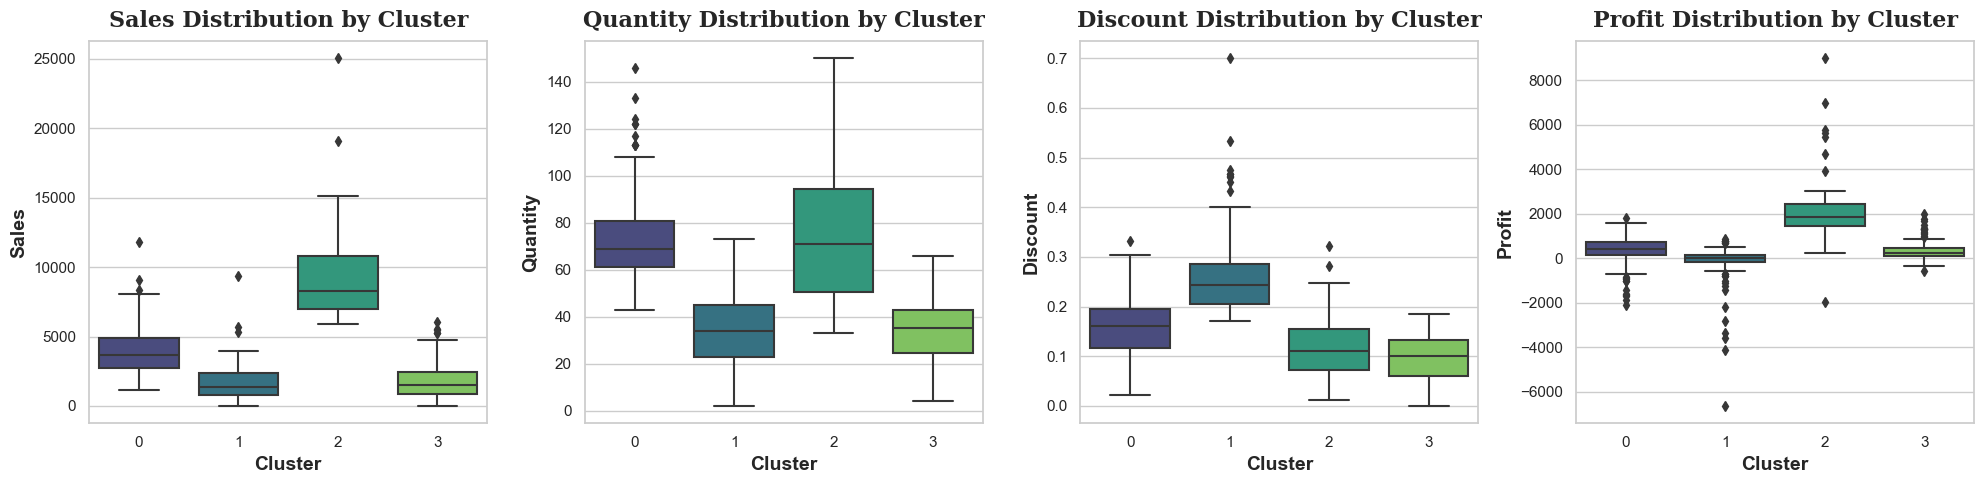

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Creating box plots for each parameter in each cluster
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

params = ['Sales', 'Quantity', 'Discount', 'Profit']

for i, param in enumerate(params):
    sns.boxplot(x='Cluster', y=param, data=customer_data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{param} Distribution by Cluster', fontsize=16, fontweight='bold', fontfamily='serif')
    axes[i].set_xlabel('Cluster', fontsize=14)
    axes[i].set_ylabel(param, fontsize=14)

plt.tight_layout()
plt.show()


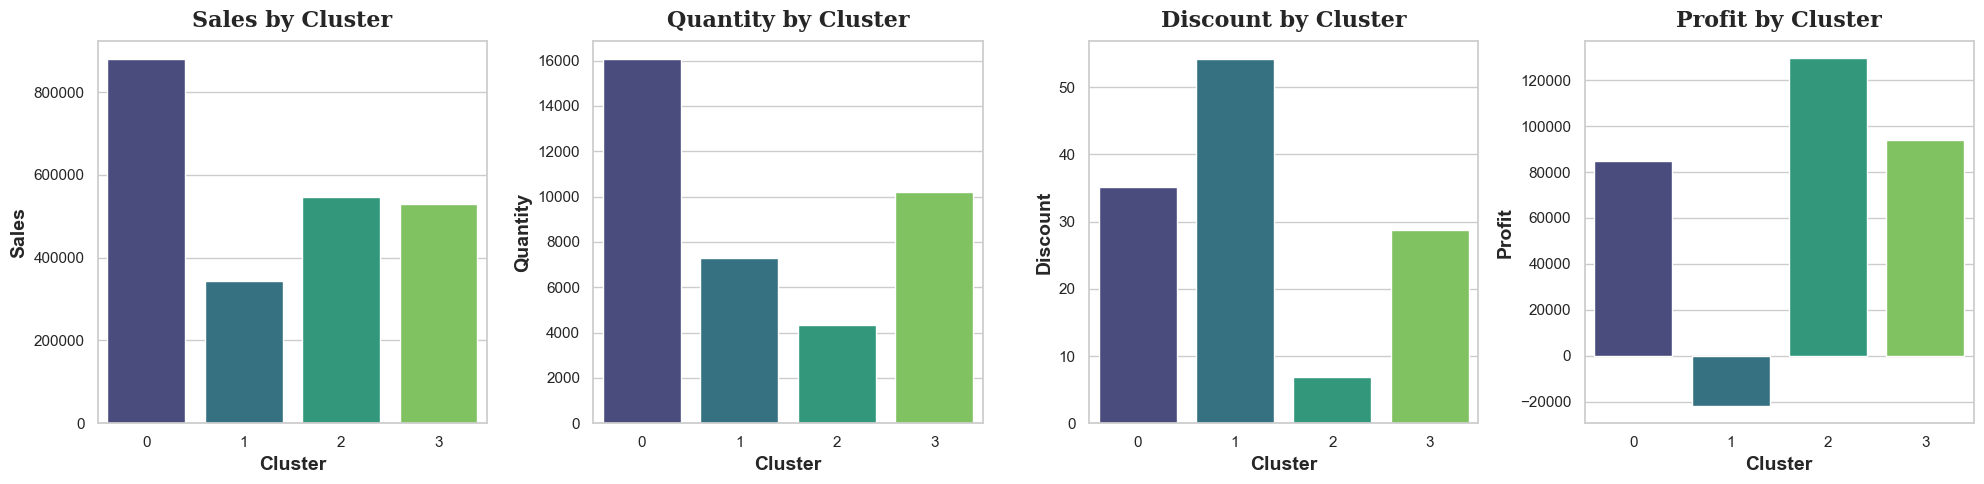

In [71]:
sns.set(style="whitegrid")

# Creating bar plots for each parameter in each cluster
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

params = ['Sales', 'Quantity', 'Discount', 'Profit']

for i, param in enumerate(params):
    # Calculate the sum of each parameter by cluster
    cluster_summary = customer_data.groupby('Cluster')[param].sum().reset_index()
    
    # Plotting bar chart for each parameter
    sns.barplot(x='Cluster', y=param, data=cluster_summary, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{param} by Cluster', fontsize=16, fontweight='bold', fontfamily='serif')
    axes[i].set_xlabel('Cluster', fontsize=14)
    axes[i].set_ylabel(param, fontsize=14)

plt.tight_layout()
plt.show()


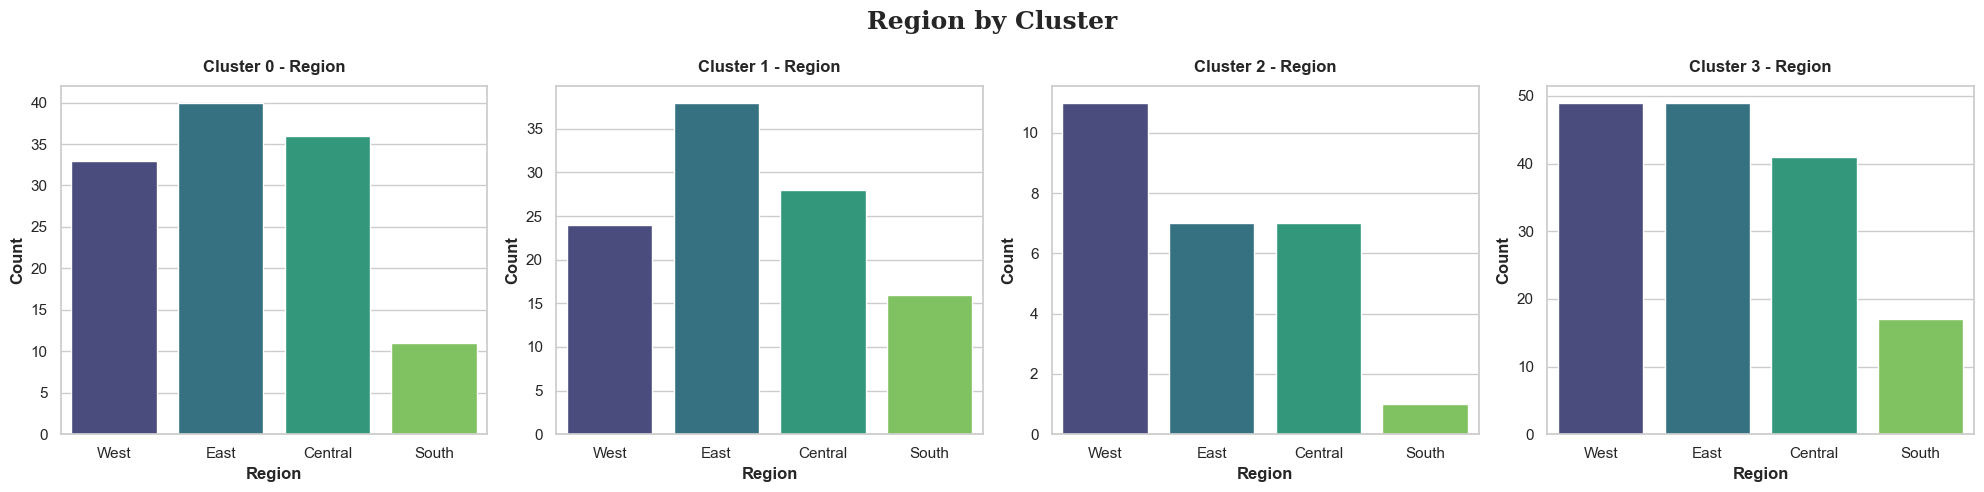

In [72]:
merged_df['Cluster'] = customer_data['Cluster']

region_order = merged_df['Region'].value_counts().index

sns.set(style="whitegrid")

plt.figure(figsize=(20, 5))

for i in range(4):  
    plt.subplot(1, 4, i+1)
    
    sns.countplot(x='Region', data=merged_df[merged_df['Cluster'] == i], order=region_order, palette='viridis')
    plt.title(f'Cluster {i} - Region')
    plt.xlabel('Region')
    plt.ylabel('Count')


plt.suptitle('Region by Cluster', fontsize=18, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.show()

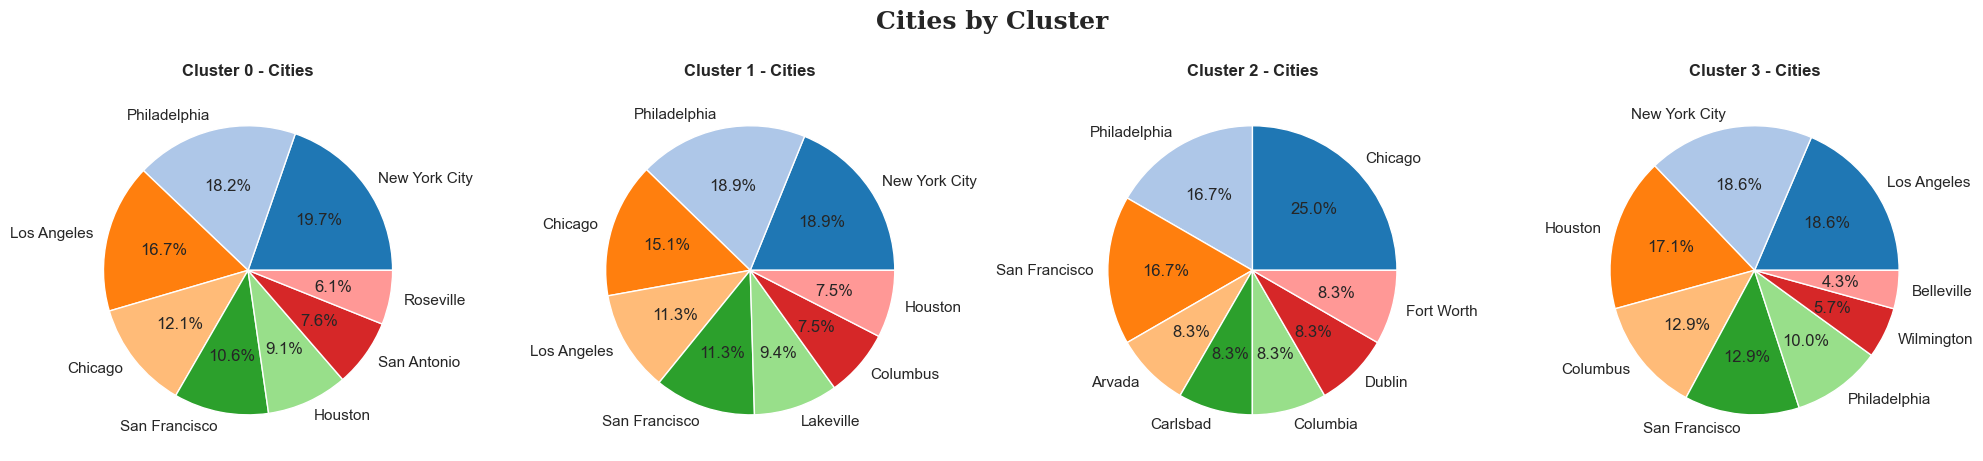

In [73]:
# Getting the top 8 cities for each cluster
top_cities = merged_df.groupby(['Cluster', 'City']).size().groupby('Cluster').nlargest(8).reset_index(level=0, drop=True).reset_index()

sns.set(style="whitegrid")

plt.figure(figsize=(20, 5))
for i in range(4): 
    plt.subplot(1, 4, i+1)
    # Filtering the top cities for the current cluster
    top_cities_cluster = top_cities[top_cities['Cluster'] == i]
    plt.pie(top_cities_cluster[0], labels=top_cities_cluster['City'], autopct='%1.1f%%', colors=plt.cm.tab20.colors)
    plt.title(f'Cluster {i} - Cities')

plt.suptitle('Cities by Cluster', fontsize=18, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.show()


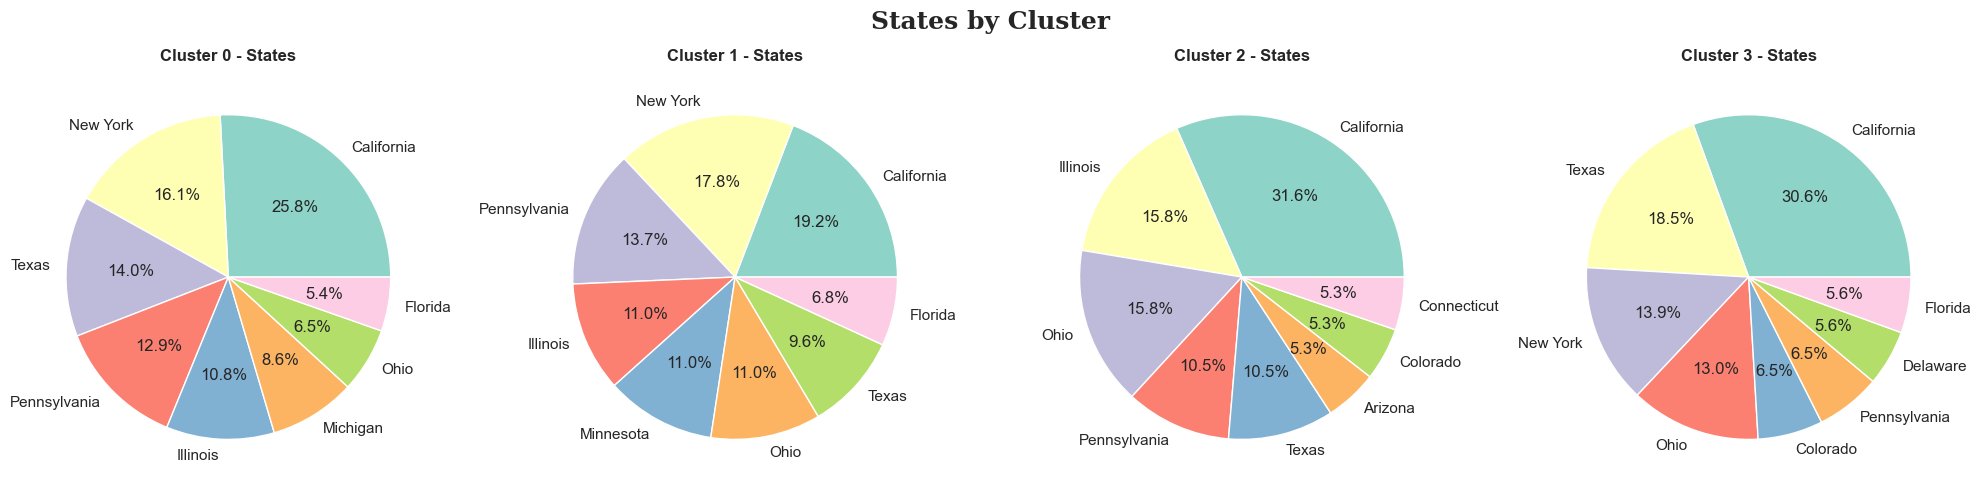

In [74]:
# Getting the top 8 states for each cluster
top_states = merged_df.groupby(['Cluster', 'State']).size().groupby('Cluster').nlargest(8).reset_index(level=0, drop=True).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 5))

for i in range(4):  
    plt.subplot(1, 4, i+1)
    # Filtering the top states for the current cluster
    top_states_cluster = top_states[top_states['Cluster'] == i]
    plt.pie(top_states_cluster[0], labels=top_states_cluster['State'], autopct='%1.1f%%', colors=plt.cm.Set3.colors)
    plt.title(f'Cluster {i} - States')

plt.suptitle('States by Cluster', fontsize=18, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.show()

### Insights From Cluster Analysis

#### Cluster 0: High Volume, Moderate Profit
- Sales Performance: Highest total sales (approx.800,000)
- Order Volume: Highest quantity (15,000+ units)
- Discount Strategy: Moderate discount rates (approx 35%)
- Profit Profile: Stable profit margins
- Regional Focus: Strong presence in East region (40%), followed by West and Central
- Key Cities: New York City (19.7%), Philadelphia (16.2%), Los Angeles (16.7%)
- Key States: California (26.8%), New York (16.1%), Texas (14%)


#### Cluster 1: High Discount, Low Profit
- Sales Performance: Lowest total sales (approx. 350,000)
- Order Volume: Moderate quantities (6,000+ units)
- Discount Strategy: Highest discount rates (approx. 50%)
- Profit Profile: Negative profits, indicating loss-making segment
- Regional Focus: Dominated by East region (37%), lowest in South
- Key Cities: New York City (18.9%), Philadelphia (18.9%), Chicago (15.1%)
- Key States: California (19.2%), New York (17.8%), Pennsylvania (13.7%)


#### Cluster 2: Premium Segment
- Sales Performance: Moderate sales (approx 500,000)
- Order Volume: Lowest quantity (4,000+ units)
- Discount Strategy: Lowest discounts (approx 8%)
- Profit Profile: Highest profits (approx 120,000)
- Regional Focus: Strong West region presence (42%), minimal in South
- Key Cities: Chicago (25%), Philadelphia (16.7%), San Francisco (16.7%)
- Key States: California (31.6%), Illinois (15.8%), Ohio (15.8%)


#### Cluster 3: Balanced Performance
- Sales Performance: Moderate sales (approx 500,000)
- Order Volume: High quantities (10,000+ units)
- Discount Strategy: Low to moderate discounts (approx 30%)
- Profit Profile: Good profit margins (approx 90,000)
- Regional Focus: Even distribution between West and East (45% each)
- Key Cities: New York City (18.6%), Los Angeles (17.1%), Columbus (12.9%)
- Key State: California (30.6%), Texas (18.5%), New York (13%)